In [219]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import heapq


In [187]:
f = open("bayg29.tsp", "r")
txt = f.readlines()

In [188]:
dic_city_length = {}
current_node = 0
dimension = 29
for i in range(8,36):
    current_node += 1
    list_weitght = [float(idx) for idx in txt[i].split()]
    for j in range(len(list_weitght)):
        dic_city_length[current_node, j + current_node + 1] = list_weitght[j]
        dic_city_length[j + current_node + 1, current_node] = list_weitght[j]

In [190]:
#creat population
def create_random_population(n,a):
    rangee = np.asarray(range(1,a+1))
    pop = np.zeros((n,a))
    for i in range(n):
        random.shuffle(rangee)
        pop[i] = rangee

    return pop
    

In [191]:
def fitness_function(pop):
    cost_dic = {} 
    for n in range(pop.shape[0]):
        cost = 0
        for i in range(pop.shape[1]):
            if i != pop.shape[1]-1:
                cost += dic_city_length[(int(pop[n][i]),int(pop[n][i+1]))]
            else:
                cost += dic_city_length[(int(pop[n][0]),int(pop[n][i]))]
        cost_dic[n] = cost
    return cost_dic

In [239]:
def selection(pop,cost,t,alpha):
    servival = []
    for i in range(alpha):
        cand_index = []
        cand_value = []
        
        for _ in range(t):
            a = random.randint(0,len(cost)-1)
            cand_index.append(a)
            cand_value.append(cost[a])
            
        winner = cand_value.index(min(cand_value))

        winner = cand_index[winner]
        servival.append(pop[winner])

    return np.asarray(servival)

In [246]:
def find_best_cor(pop):
    best_cor = -1
    best_dis = 100000000
    for n in range(pop.shape[0]):
        cost = 0
        for i in range(pop.shape[1]):
            if i != pop.shape[1]-1:
                cost += dic_city_length[(int(pop[n][i]),int(pop[n][i+1]))]
            else:
                cost += dic_city_length[(int(pop[n][0]),int(pop[n][i]))]
        if cost < best_dis:
            best_dis = cost
            best_cor = n
            
    return best_cor, best_dis

In [194]:
def make_child(pop,alpha):
    childs = []
    for i in range(alpha):
        parent_1 = pop[random.randint(0,pop.shape[0]-1)]
        parent_2 = pop[random.randint(0,pop.shape[0]-1)]
        
        child = np.asarray(range(len(parent_1)))

        point_1 = random.randint(0,pop.shape[1]-1)
        point_2 = random.randint(0,pop.shape[1]-1)
        if point_1 > point_2:
            point_1, point_2 = point_2, point_1
            
        cross = parent_1[point_1:point_2]
        
        t = 0
        z = 0
        for j in range(len(parent_1)):
            if j not in range(point_1,point_2):
                while True:
                    if parent_2[t] not in cross:
                        child[j] = parent_2[t]
                        t +=1
                        break
                    else:
                        t += 1
            else:
                child[j] = cross[z]
                z += 1
        
        childs.append(child)
    return np.asarray(childs)

In [195]:
def mutation(pop,alpha):
    cors = [pop[random.randint(0,pop.shape[0]-1)] for _ in range(alpha)]
    for i in range(len(cors)):
        p_1 = random.randint(0,pop.shape[1]-1)
        p_2 = random.randint(0,pop.shape[1]-1)
        
        cors[i][p_1],cors[i][p_2] = cors[i][p_2],cors[i][p_1]
    return np.asarray(cors)

In [196]:
def check_finish(i,result,iter=500, convergation = 1):
    if i>iter:
        return True

In [197]:
def one_step(population, cor_len, t, selection_per, childs_per, mutation_per):
        childs = make_child(population,childs_per)       
        mutated  = mutation(population,mutation_per)

        pop = np.concatenate((childs,mutated))
        population = np.concatenate((population,pop))
        
        cost = fitness_function(population)
        serv = selection(population,cost, t, selection_per)
            
        return serv

In [252]:
def training(population_n, cor_len, t, selection_per, childs_per, mutation_per, repetition=10, iteration=200):
    result_value = []
    result_cor = []
    for i in range(repetition):
        population = create_random_population(population_n, cor_len)
        iter_history = []
        iterr = 0
#         print(i)
        while True:
            if iterr%100==0 and iterr>1: 
                print(iterr)
                print(iter_history[-1])
            population = one_step(population, cor_len, t, selection_per, childs_per, mutation_per)
            
            best_res = find_best_cor(population)
            iter_history.append(best_res[1])
            
            if check_finish(iterr,iter_history,iter=iteration): break
            
            iterr += 1
        
        result_cor.append(best_res[0])
        result_value.append(iter_history)    

        print(min(iter_history))
    
    return result_value,result_cor

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


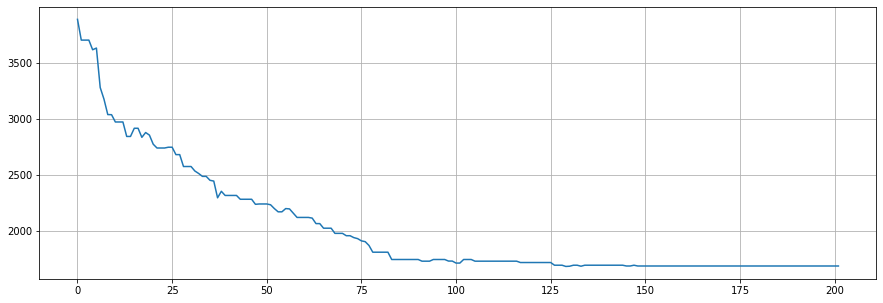

1683.0


In [178]:
res = training(100,29,3,100,50,50,repetition=200)
best = 0
for i in range(10):
    if min(res[0][i]) < min(res[0][best]):
        bset = i
        
fig = plt.figure(figsize=(15, 5))
plt.grid(True)
plt.plot(range(0,202), res[0][best])
plt.show()
print(min(res[0][best]))

In [202]:
f = open("gr229.tsp", "r")
txt = f.readlines()
dic_city_location = {}
dic_city_length = {}
for i in range(len(txt)):
    if 'DIMENSION' in txt[i]:
        dimension = [int(s) for s in txt[i].split() if s.isdigit()][0]
    if 'NODE_COORD_SECTION' in txt[i]:
        for j in range(i + 1, i + 1 + dimension):
            city_location = [float(idx) for idx in txt[j].split()]
            dic_city_location[city_location[0]] = city_location[1], city_location[2]
for i in range(1, len(dic_city_location)):
    for j in range(1, len(dic_city_location)):
        if(j >= i):
            dic_city_length[i, j + 1] = math.sqrt(pow((dic_city_location[i][0] - dic_city_location[j + 1][0]), 2) + pow((dic_city_location[i][1] - dic_city_location[j + 1][1]), 2))
            dic_city_length[j + 1, i] = math.sqrt(pow((dic_city_location[i][0] - dic_city_location[j + 1][0]), 2) + pow((dic_city_location[i][1] - dic_city_location[j + 1][1]), 2))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
2790.5343920053283


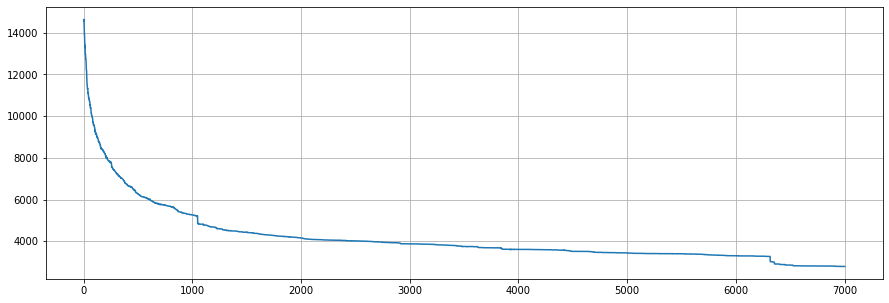

2790.5343920053283


In [211]:
k = 7000
m = 1
res = training(100,229,3,100,50,50,repetition=m,iteration=k)
best = 0
for i in range(m):
    if min(res[0][i]) < min(res[0][best]):
        bset = i
        
fig = plt.figure(figsize=(15, 5))
plt.grid(True)
plt.plot(range(0,k+2), res[0][best])
plt.show()
print(min(res[0][best]))

In [243]:
f = open("pr1002.tsp", "r")
txt = f.readlines()
dic_city_location = {}
dic_city_length = {}
for i in range(len(txt)):
    if 'DIMENSION' in txt[i]:
        dimension = [int(s) for s in txt[i].split() if s.isdigit()][0]
    if 'NODE_COORD_SECTION' in txt[i]:
        for j in range(i + 1, i + 1 + dimension):
            city_location = [float(idx) for idx in txt[j].split()]
            dic_city_location[city_location[0]] = city_location[1], city_location[2]
for i in range(1, len(dic_city_location)):
    for j in range(1, len(dic_city_location)):
        if(j >= i):
            dic_city_length[i, j + 1] = math.sqrt(pow((dic_city_location[i][0] - dic_city_location[j + 1][0]), 2) + pow((dic_city_location[i][1] - dic_city_location[j + 1][1]), 2))
            dic_city_length[j + 1, i] = math.sqrt(pow((dic_city_location[i][0] - dic_city_location[j + 1][0]), 2) + pow((dic_city_location[i][1] - dic_city_location[j + 1][1]), 2))

100
5054027.808839593
200
4430683.378942527
300
4057043.1961215064
400
3822135.5337529765
500
3659935.2827348555
600
3490454.9398186784
700
3347998.7875049
800
3227456.1493481332
900
3120618.7129430263
1000
3039355.4479311365
1100
2976690.6510028713
1200
2894057.3472016086
1300
2816731.365967997
1400
2755704.22235167
1500
2693258.1358549665
1600
2637177.737487655
1700
2580394.620681261
1800
2535385.535705796
1900
2492108.5372775965
2000
2444159.042674866
2100
2393230.9692812003
2200
2361143.0507101775
2300
2324454.626025857
2400
2299565.9237338803
2500
2271473.8193802354
2600
2251120.372160126
2700
2228772.7296580244
2800
2204928.547510834
2900
2174258.7701650206
3000
2154462.1300512487
3100
2129964.1543277157
3200
2112838.0995032242
3300
2086701.2938482612
3400
2067158.3501918209
3500
2048738.2245784816
3600
2026506.7187843225
3700
2010652.9347863195
3800
1990369.8465728022
3900
1973382.7697697866
4000
1958130.9684146529
4100
1944224.0881447687
4200
1929986.2815308392
4300
1917386.621

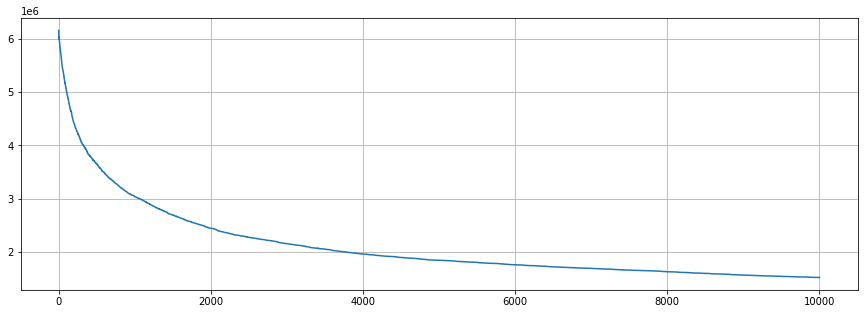

1517689.5011221403


In [254]:
k = 10000
m = 1
res = training(100,1002,4,100,50,50,repetition=m,iteration=k)
best = 0
for i in range(m):
    if min(res[0][i]) < min(res[0][best]):
        bset = i
        
fig = plt.figure(figsize=(15, 5))
plt.grid(True)
plt.plot(range(0,k+2), res[0][best])
plt.show()
print(min(res[0][best]))